웹 페이지 데이터 수집하기 (웹 스크래핑)

In [2]:
import requests 
from bs4 import BeautifulSoup

with requests.Session() as session:
    #세션 객체에 웹 브라우저 정보 주입
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    })

    url = "https://data.hossam.kr/py/sample.html"
    r = session.get(url)

    # HTTP 상태 값이 200이 아닌 경우는 강제로 에러를 발생시켜서 코드의 진행을 중단
    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

<Response [200]>


In [4]:
r.encoding = "utf-8"

print(type(r.text))
r.text

<class 'str'>


'<!DOCTYPE html><html lang="ko"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0"><title>Document</title><style>h1{ color: #f0f;} h2{ color: #06f;} .myclass{ color: #f00;} #myid{ color: #f60;} .syllabus >li >ol >li{ text-decoration: underline;} .syllabus ol{ font-weight: bold;} .part1{ background-color: #eeeeee;} .part2{ background-color: #d5d5d5;} div.sub.part1{ border: 1px dotted #000;} div.sub.part2#hello{ border: 1px solid #555;} a[href]{ font-size: 20px;} a[href=\'#\']{ color: green;} </style></head><body><h1>Hello World</h1><a>link0</a><a href="#">link1</a><a href="https://www.naver.com">link2</a><h2 id="myid">Python</h2><div class="sub part1"><ul class="syllabus"><li>변수와 데이터 타입</li><li class="myclass">연산자</li><li>연속성 자료형 <ol><li>리스트(list)</li><li>딕셔너리(dict)</li><li>집합(set)</li></ol></li><li>프로그램 흐름제어</li><li>함수</li></ul></div><h2>Data Analysis</h2><div class="sub part2" id="hello"><ul><li>데이터 수집</li><li class="myclass">데이터 전처리</li>

응답 결과에 대한 BeautifulSoup 객체 생성

In [5]:
soup = BeautifulSoup(r.text)
print(type(soup))
soup

<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>
<html lang="ko"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><title>Document</title><style>h1{ color: #f0f;} h2{ color: #06f;} .myclass{ color: #f00;} #myid{ color: #f60;} .syllabus >li >ol >li{ text-decoration: underline;} .syllabus ol{ font-weight: bold;} .part1{ background-color: #eeeeee;} .part2{ background-color: #d5d5d5;} div.sub.part1{ border: 1px dotted #000;} div.sub.part2#hello{ border: 1px solid #555;} a[href]{ font-size: 20px;} a[href='#']{ color: green;} </style></head><body><h1>Hello World</h1><a>link0</a><a href="#">link1</a><a href="https://www.naver.com">link2</a><h2 id="myid">Python</h2><div class="sub part1"><ul class="syllabus"><li>변수와 데이터 타입</li><li class="myclass">연산자</li><li>연속성 자료형 <ol><li>리스트(list)</li><li>딕셔너리(dict)</li><li>집합(set)</li></ol></li><li>프로그램 흐름제어</li><li>함수</li></ul></div><h2>Data Analysis</h2><div class="sub part2" id="hello"><ul><li>데이터 수집</li><li class="myclass">데이터 전처리</li>

HTML태그에 의한 추출

In [7]:
myselect = soup.select("h1")
print(type(myselect))
myselect

<class 'bs4.element.ResultSet'>


[<h1>Hello World</h1>]

리턴 타입이 항상 리스트이므로 리스트 원소 접근하듯이 HTML 태그 객체를 추출함

In [12]:
mytag = myselect[0]
print(type(mytag))
mytag

<class 'bs4.element.Tag'>


<h1>Hello World</h1>

복수 요소에게 적용되는 속성

    - class 속성은 비슷한 디자인 특성을 갖는 요소가 대개임.
    - 공통적으로 부여될 수 있으므로 복수 요소 추출때 사용

In [18]:
myselect = soup.select(".myclass")
myselect

[<li class="myclass">연산자</li>,
 <li class="myclass">데이터 전처리</li>,
 <ol class="myclass"><li>기초통계</li><li>데이터 시각화</li></ol>]

복수 요소 = 반복문
- 외부에서 가져온 데이터이므로 strip을 통해 앞뒤 공백 제거하는게 좋음

In [20]:
for i, v in enumerate(myselect):
    #추출한 요소가 하위 태그를 포함하는 경우 그 안의 텍스트만 일괄 추출
    print("%d번째 요소 : %s" %(i,v.text.strip()))

0번째 요소 : 연산자
1번째 요소 : 데이터 전처리
2번째 요소 : 기초통계데이터 시각화


특정 HTML 태그 객체의 하위 요소 추출하기
- select() 메서드로 추출한 요소를 활용하여 그 하위요소를 추가적으로 추출할 수 있다.

In [29]:
myli = myselect[2].select("li")
myli

[<li>기초통계</li>, <li>데이터 시각화</li>]

In [30]:
for i in myli:
    print(i.text.strip())

기초통계
데이터 시각화


id에 의한 추출
- id는 보통 하나이기 때문에 반복문 필요 없음

In [31]:
myselect = soup.select("#myid")
myselect

[<h2 id="myid">Python</h2>]

In [34]:
print(myselect[0].text.strip())

Python


여러 요소에 동시 접근하기
- 다양한 선택자를 ,로 구분하여 지정한다

In [35]:
items = soup.select("#myid, .myclass")
items

[<h2 id="myid">Python</h2>,
 <li class="myclass">연산자</li>,
 <li class="myclass">데이터 전처리</li>,
 <ol class="myclass"><li>기초통계</li><li>데이터 시각화</li></ol>]

In [36]:
for i in items:
    print(i.text)

Python
연산자
데이터 전처리
기초통계데이터 시각화


복합 선택자
- 자식 선택자 (">"), 자손 선택자 (" ")

In [38]:
soup.select(".syllabus > .myclass")

[<li class="myclass">연산자</li>]

In [39]:
soup.select(".part1 .myclass")

[<li class="myclass">연산자</li>]

속성 선택자
- href 속성을 갖는 요소 추출하기

In [40]:
myselect = soup.select("a[href]")
myselect

[<a href="#">link1</a>, <a href="https://www.naver.com">link2</a>]

href 속성에 적용되어 있는 값 추출하기

In [42]:
# 속성 값은 각 태그요소의 attrs 프로퍼티로 접근 가능 --> dict 형태
for i, v in enumerate(myselect):
    print("----[%d]----" %i)
    print(v.attrs)

    # 딕셔너리에 의한 in 연산자는 key의 존재 여부를 판별
    if "href" in v.attrs:
        print("%d번째의 href속성값 : %s" %(i,v.attrs["href"]))

----[0]----
{'href': '#'}
0번째의 href속성값 : #
----[1]----
{'href': 'https://www.naver.com'}
1번째의 href속성값 : https://www.naver.com


연구과제

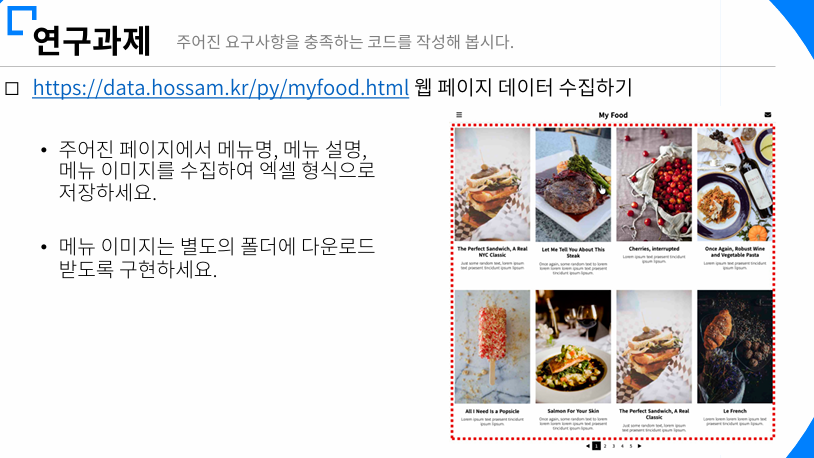

In [122]:
import requests 
from bs4 import BeautifulSoup

with requests.Session() as session:
    #세션 객체에 웹 브라우저 정보 주입
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    })

    url = "https://data.hossam.kr/py/myfood.html"
    r = session.get(url)

    # HTTP 상태 값이 200이 아닌 경우는 강제로 에러를 발생시켜서 코드의 진행을 중단
    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

<Response [200]>


In [45]:
soup = BeautifulSoup(r.text)
print(type(soup))
soup

<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>
<html lang="ko" translate="no"><head><meta charset="utf-8"/><meta content="notranslate" name="google"><meta content="width=device-width, initial-scale=1.0" name="viewport"/><title>FoodBlog</title><link href="https://fonts.googleapis.com/css2?family=Noto+Sans+KR:wght@100;300;400;500;700;900&amp;display=swap" rel="stylesheet"/><link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.6.0/css/all.min.css" rel="stylesheet"/><link href="https://preview.hossam.kr/html/myfood/assets/css/reset.css" rel="stylesheet"/><link href="https://preview.hossam.kr/html/myfood/assets/css/common.css" rel="stylesheet"/><link href="https://preview.hossam.kr/html/myfood/assets/css/index.css" rel="stylesheet"/></meta></head><body><div class="container"><header class="header"><div class="content-container"><a class="icon-button left" href="#"><i class="fa-solid fa-bars"></i></a><h1 class="logo">My Food</h1><a class="icon-button right" href="#"><i class="fa-solid fa-envelope"></i></a></di

In [ ]:
myselect = soup.select(".food-content")
print(myselect)
# menu = myselect.select("h2")
me = []
for i in myselect:
    menu = i.select("h2")
    me.append(i.text)
# for i in menu:
#     # print(i.text)
#     me.append(i.text)
me

[<div class="food-content"><h2>The Perfect Sandwich, A Real NYC Classic</h2><p>Just some random text, lorem ipsum text praesent tincidunt ipsum lipsum</p></div>, <div class="food-content"><h2>Let Me Tell You About This Steak</h2><p>Once again, some random text to lorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.</p></div>, <div class="food-content"><h2>Cherries, interrupted</h2><p>Lorem ipsum text praesent tincidunt ipsum lipsum.</p></div>, <div class="food-content"><h2>Once Again, Robust Wine and Vegetable Pasta</h2><p>Lorem ipsum text praesent tincidunt ipsum lipsum.</p></div>, <div class="food-content"><h2>All I Need Is a Popsicle</h2><p>Lorem ipsum text praesent tincidunt ipsum lipsum.</p></div>, <div class="food-content"><h2>Salmon For Your Skin</h2><p>Once again, some random text to lorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.</p></div>, <div class="food-content"><h2>The Perfect Sandwich, A Real Classic</h2><p>Just some random text, lorem 

['The Perfect Sandwich, A Real NYC ClassicJust some random text, lorem ipsum text praesent tincidunt ipsum lipsum',
 'Let Me Tell You About This SteakOnce again, some random text to lorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.',
 'Cherries, interruptedLorem ipsum text praesent tincidunt ipsum lipsum.',
 'Once Again, Robust Wine and Vegetable PastaLorem ipsum text praesent tincidunt ipsum lipsum.',
 'All I Need Is a PopsicleLorem ipsum text praesent tincidunt ipsum lipsum.',
 'Salmon For Your SkinOnce again, some random text to lorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.',
 'The Perfect Sandwich, A Real ClassicJust some random text, lorem ipsum text praesent tincidunt ipsum lipsum.',
 'Le FrenchLorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.']

In [85]:
# menu_explain = soup.select("p")
# menu_explain
me_ex=[]
for i in myselect:
    menu_explain = i.select("p")
    me_ex.append(i.text)

me_ex

['The Perfect Sandwich, A Real NYC ClassicJust some random text, lorem ipsum text praesent tincidunt ipsum lipsum',
 'Let Me Tell You About This SteakOnce again, some random text to lorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.',
 'Cherries, interruptedLorem ipsum text praesent tincidunt ipsum lipsum.',
 'Once Again, Robust Wine and Vegetable PastaLorem ipsum text praesent tincidunt ipsum lipsum.',
 'All I Need Is a PopsicleLorem ipsum text praesent tincidunt ipsum lipsum.',
 'Salmon For Your SkinOnce again, some random text to lorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.',
 'The Perfect Sandwich, A Real ClassicJust some random text, lorem ipsum text praesent tincidunt ipsum lipsum.',
 'Le FrenchLorem lorem lorem lorem ipsum text praesent tincidunt ipsum lipsum.']

In [111]:
myselect = soup.select(".img-wrapper")
# print(myselect)
me_img = []
for i,v in enumerate(myselect):
    # print(v.img["src"])
    me_img.append(v.img["src"])
me_img
# 속성 값은 각 태그요소의 attrs 프로퍼티로 접근 가능 --> dict 형태
# for i, v in enumerate(menu_img):
#     # print("----[%d]----" %i)
#     # print(v.attrs)

#     # 딕셔너리에 의한 in 연산자는 key의 존재 여부를 판별
#     if "src" in v.attrs:
#         # print("%d번째의 href속성값 : %s" %(i,v.attrs["src"]))
#         me_img.append(v.attrs["src"])
# me_img

['https://preview.hossam.kr/html/myfood/assets/img/sandwich.jpg',
 'https://preview.hossam.kr/html/myfood/assets/img/steak.jpg',
 'https://preview.hossam.kr/html/myfood/assets/img/cherries.jpg',
 'https://preview.hossam.kr/html/myfood/assets/img/wine.jpg',
 'https://preview.hossam.kr/html/myfood/assets/img/popsicle.jpg',
 'https://preview.hossam.kr/html/myfood/assets/img/salmon.jpg',
 'https://preview.hossam.kr/html/myfood/assets/img/sandwich.jpg',
 'https://preview.hossam.kr/html/myfood/assets/img/croissant.jpg']

엑셀 파일로 저장하기

In [69]:
import requests
from pandas import DataFrame
from concurrent import futures

In [116]:
# len(me), len(me_ex), len(me_img)
data = {
    "메뉴명": me,
    "설명": me_ex,
    "이미지": me_img
}
df = DataFrame(data)
df
df.to_excel("myfood.xlsx")


이미지 파일 별도 폴더에 다운로드 구현

In [123]:
def download(url, target):
    session.headers.update({ "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"})
    
    try:
        r = session.get(url, stream=True)
        r.encoding = "utf-8"

        with open(target,"wb") as f:
            f.write(r.raw.read())
            print(target, "가 저장되었습니다.")
    except Exception as e:
        print(target, "저장 실패", e)


In [124]:
import os
import datetime as dt

dirname = dt.datetime.now().strftime("%Y%m%d-%H%M%S")
os.mkdir(dirname+"웹 페이지 데이터 수집하기 실습")

for i, v in enumerate(me_img):
    file_path = os.path.join(dirname+"웹 페이지 데이터 수집하기 실습", "%d.jpg" %i)
    download(v, file_path)


20251107-171704웹 페이지 데이터 수집하기 실습\0.jpg 가 저장되었습니다.
20251107-171704웹 페이지 데이터 수집하기 실습\1.jpg 가 저장되었습니다.
20251107-171704웹 페이지 데이터 수집하기 실습\2.jpg 가 저장되었습니다.
20251107-171704웹 페이지 데이터 수집하기 실습\3.jpg 가 저장되었습니다.
20251107-171704웹 페이지 데이터 수집하기 실습\4.jpg 가 저장되었습니다.
20251107-171704웹 페이지 데이터 수집하기 실습\5.jpg 가 저장되었습니다.
20251107-171704웹 페이지 데이터 수집하기 실습\6.jpg 가 저장되었습니다.
20251107-171704웹 페이지 데이터 수집하기 실습\7.jpg 가 저장되었습니다.
